In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

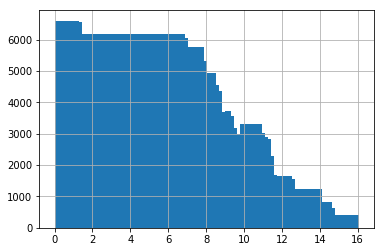

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


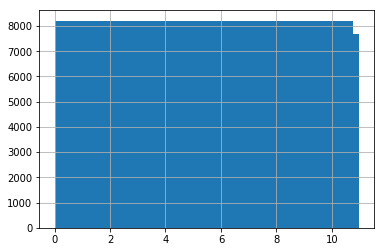

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

7

In [27]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [60]:
GNO=200
!mkdir -p input/sub/{GNO}

In [61]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/200'

In [47]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, "sub{}_q{}_a11_s{}.csv".format(GNO,qno, randseed))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [48]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=None,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[None,None],
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [50]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'mae',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          'seed': 1,
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [39]:
best_mae=1e10

In [51]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf, seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [62]:
best={'colsample_bytree': 0.5047851370096611,
 'learning_rate': 0.001623327998143825,
 'max_depth': 3.620081401210768,
 'min_data_in_leaf': 5.006595576560673,
 'min_sum_hessian_in_leaf': 0.0007950517311813728,
 'num_leaves': 60.08234368141781,
 'reg_alpha': 2.918236416019113,
 'reg_lambda': 1.1799851577913918,
 'subsample': 0.35313520995679815}

In [63]:
scores=[]
for _ in range(5):
    randseed=np.random.randint(low=1, high=11111111)
    best['seed']=randseed
    a=lgbcv(**best)
    scores.append(a)

valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.61514	valid_1's l1: 1.73475
[200]	training's l1: 1.2521	valid_1's l1: 1.3897
[300]	training's l1: 1.15607	valid_1's l1: 1.32042
[400]	training's l1: 1.11132	valid_1's l1: 1.28042
[500]	training's l1: 1.08744	valid_1's l1: 1.2588
[600]	training's l1: 1.07172	valid_1's l1: 1.24698
[700]	training's l1: 1.06003	valid_1's l1: 1.2382
[800]	training's l1: 1.04939	valid_1's l1: 1.23314
[900]	training's l1: 1.03912	valid_1's l1: 1.22905
[1000]	training's l1: 1.03022	valid_1's l1: 1.22715
[1100]	training's l1: 1.022	valid_1's l1: 1.22746
Early stopping, best iteration is:
[1030]	training's l1: 1.02781	valid_1's l1: 1.2265
write to /home/hadoop/lanlep2019/input/sub/200/sub200_q1_a11_s5850300.csv
quake  1 (1.2265045207781746, 1030)
valid quake 2
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[

[1500]	training's l1: 1.01291	valid_1's l1: 0.912411
Early stopping, best iteration is:
[1458]	training's l1: 1.01601	valid_1's l1: 0.911457
write to /home/hadoop/lanlep2019/input/sub/200/sub200_q9_a11_s5850300.csv
quake  9 (0.9114572102424192, 1458)
valid quake 10
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.63375	valid_1's l1: 1.5615
[200]	training's l1: 1.27328	valid_1's l1: 1.15463
[300]	training's l1: 1.17606	valid_1's l1: 1.06998
[400]	training's l1: 1.12895	valid_1's l1: 1.03915
[500]	training's l1: 1.10338	valid_1's l1: 1.02395
[600]	training's l1: 1.08749	valid_1's l1: 1.01417
[700]	training's l1: 1.07545	valid_1's l1: 1.00619
[800]	training's l1: 1.06555	valid_1's l1: 1.00037
[900]	training's l1: 1.05709	valid_1's l1: 0.996467
[1000]	training's l1: 1.04794	valid_1's l1: 0.99336
[1100]	training's l1: 1.03948	valid_1's l1: 0.992111
[1200]	training's l1: 1.03041	valid_1's l1: 0.99173
[1300]	tr

[200]	training's l1: 1.26968	valid_1's l1: 1.19395
[300]	training's l1: 1.17288	valid_1's l1: 1.11219
[400]	training's l1: 1.12647	valid_1's l1: 1.08981
[500]	training's l1: 1.10112	valid_1's l1: 1.08459
[600]	training's l1: 1.08534	valid_1's l1: 1.07914
[700]	training's l1: 1.07294	valid_1's l1: 1.07495
[800]	training's l1: 1.06272	valid_1's l1: 1.07191
[900]	training's l1: 1.05374	valid_1's l1: 1.06934
[1000]	training's l1: 1.04468	valid_1's l1: 1.06959
Early stopping, best iteration is:
[965]	training's l1: 1.04785	valid_1's l1: 1.06816
write to /home/hadoop/lanlep2019/input/sub/200/sub200_q4_a11_s7219779.csv
quake  4 (1.0681589824828683, 965)
valid quake 5
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.6196	valid_1's l1: 1.70815
[200]	training's l1: 1.26011	valid_1's l1: 1.45463
[300]	training's l1: 1.16418	valid_1's l1: 1.38237
[400]	training's l1: 1.11738	valid_1's l1: 1.33998
[500]	training's l1

[1600]	training's l1: 1.00397	valid_1's l1: 0.927628
Early stopping, best iteration is:
[1521]	training's l1: 1.00912	valid_1's l1: 0.926598
write to /home/hadoop/lanlep2019/input/sub/200/sub200_q12_a11_s7219779.csv
quake  12 (0.9265982216619816, 1521)
valid quake 13
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.62057	valid_1's l1: 1.55003
[200]	training's l1: 1.26516	valid_1's l1: 1.28981
[300]	training's l1: 1.17057	valid_1's l1: 1.18916
[400]	training's l1: 1.12444	valid_1's l1: 1.13206
[500]	training's l1: 1.0995	valid_1's l1: 1.10235
[600]	training's l1: 1.0835	valid_1's l1: 1.08489
[700]	training's l1: 1.07161	valid_1's l1: 1.07315
[800]	training's l1: 1.06154	valid_1's l1: 1.06616
[900]	training's l1: 1.05234	valid_1's l1: 1.06205
[1000]	training's l1: 1.04376	valid_1's l1: 1.06116
[1100]	training's l1: 1.03547	valid_1's l1: 1.06142
Early stopping, best iteration is:
[1009]	training's l1: 1.043

[600]	training's l1: 1.0558	valid_1's l1: 1.36764
[700]	training's l1: 1.04383	valid_1's l1: 1.36368
[800]	training's l1: 1.03393	valid_1's l1: 1.35979
[900]	training's l1: 1.02476	valid_1's l1: 1.35777
[1000]	training's l1: 1.01515	valid_1's l1: 1.35667
[1100]	training's l1: 1.00656	valid_1's l1: 1.35648
Early stopping, best iteration is:
[1092]	training's l1: 1.00723	valid_1's l1: 1.35587
write to /home/hadoop/lanlep2019/input/sub/200/sub200_q7_a11_s4123475.csv
quake  7 (1.3558694101271738, 1092)
valid quake 8
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.61193	valid_1's l1: 1.73483
[200]	training's l1: 1.25015	valid_1's l1: 1.56254
[300]	training's l1: 1.1555	valid_1's l1: 1.4897
[400]	training's l1: 1.11012	valid_1's l1: 1.44128
[500]	training's l1: 1.08584	valid_1's l1: 1.4132
[600]	training's l1: 1.07023	valid_1's l1: 1.39743
[700]	training's l1: 1.05847	valid_1's l1: 1.38577
[800]	training's l1

quake  1 (1.222859843276746, 980)
valid quake 2
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.59927	valid_1's l1: 1.82607
[200]	training's l1: 1.23931	valid_1's l1: 1.45296
[300]	training's l1: 1.14636	valid_1's l1: 1.37269
[400]	training's l1: 1.10243	valid_1's l1: 1.34134
[500]	training's l1: 1.07776	valid_1's l1: 1.32883
[600]	training's l1: 1.06179	valid_1's l1: 1.31862
[700]	training's l1: 1.04956	valid_1's l1: 1.31413
[800]	training's l1: 1.03959	valid_1's l1: 1.31142
[900]	training's l1: 1.03044	valid_1's l1: 1.3107
[1000]	training's l1: 1.02122	valid_1's l1: 1.31126
Early stopping, best iteration is:
[958]	training's l1: 1.02556	valid_1's l1: 1.30952
write to /home/hadoop/lanlep2019/input/sub/200/sub200_q2_a11_s7078586.csv
quake  2 (1.3095237974997376, 958)
valid quake 3
(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training'

[800]	training's l1: 1.06702	valid_1's l1: 0.999569
[900]	training's l1: 1.05841	valid_1's l1: 0.995679
[1000]	training's l1: 1.04873	valid_1's l1: 0.993786
[1100]	training's l1: 1.04003	valid_1's l1: 0.992503
[1200]	training's l1: 1.03175	valid_1's l1: 0.991207
[1300]	training's l1: 1.02368	valid_1's l1: 0.990794
[1400]	training's l1: 1.01593	valid_1's l1: 0.990502
Early stopping, best iteration is:
[1355]	training's l1: 1.01928	valid_1's l1: 0.990122
write to /home/hadoop/lanlep2019/input/sub/200/sub200_q10_a11_s7078586.csv
quake  10 (0.990122067552636, 1355)
valid quake 11
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.63275	valid_1's l1: 1.55634
[200]	training's l1: 1.27621	valid_1's l1: 1.13002
[300]	training's l1: 1.18049	valid_1's l1: 1.03529
[400]	training's l1: 1.13282	valid_1's l1: 1.00615
[500]	training's l1: 1.10746	valid_1's l1: 1.00095
[600]	training's l1: 1.09075	valid_1's l1: 1.00065
[7

[200]	training's l1: 1.25907	valid_1's l1: 1.44689
[300]	training's l1: 1.1631	valid_1's l1: 1.37705
[400]	training's l1: 1.11639	valid_1's l1: 1.33597
[500]	training's l1: 1.09078	valid_1's l1: 1.3106
[600]	training's l1: 1.07518	valid_1's l1: 1.30005
[700]	training's l1: 1.06349	valid_1's l1: 1.29165
[800]	training's l1: 1.05294	valid_1's l1: 1.28547
[900]	training's l1: 1.04408	valid_1's l1: 1.28191
[1000]	training's l1: 1.03502	valid_1's l1: 1.27997
[1100]	training's l1: 1.02645	valid_1's l1: 1.278
Early stopping, best iteration is:
[1029]	training's l1: 1.03238	valid_1's l1: 1.27768
write to /home/hadoop/lanlep2019/input/sub/200/sub200_q5_a11_s4434072.csv
quake  5 (1.2776762200168206, 1029)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.61581	valid_1's l1: 1.72845
[200]	training's l1: 1.25475	valid_1's l1: 1.47777
[300]	training's l1: 1.15652	valid_1's l1: 1.4213
[400]	training's l1:

[100]	training's l1: 1.5937	valid_1's l1: 1.82887
[200]	training's l1: 1.22772	valid_1's l1: 1.53202
[300]	training's l1: 1.13633	valid_1's l1: 1.46251
[400]	training's l1: 1.09237	valid_1's l1: 1.43414
[500]	training's l1: 1.06721	valid_1's l1: 1.42937
[600]	training's l1: 1.05076	valid_1's l1: 1.42902
Early stopping, best iteration is:
[559]	training's l1: 1.05684	valid_1's l1: 1.4279
write to /home/hadoop/lanlep2019/input/sub/200/sub200_q14_a11_s4434072.csv
quake  14 (1.4279030322474566, 559)
valid quake 15
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.63286	valid_1's l1: 1.57861
[200]	training's l1: 1.27323	valid_1's l1: 1.16823
[300]	training's l1: 1.17425	valid_1's l1: 1.13667
[400]	training's l1: 1.12523	valid_1's l1: 1.13156
[500]	training's l1: 1.09988	valid_1's l1: 1.12661
[600]	training's l1: 1.08338	valid_1's l1: 1.12107
[700]	training's l1: 1.07107	valid_1's l1: 1.11687
[800]	training's l

In [65]:
scores,np.mean(scores)

([1.148629280019557,
  1.1493266577742343,
  1.1494278941754739,
  1.1485151484760086,
  1.1485128428330953],
 1.1488823646556736)

In [66]:
files= !ls /mnt/lanlep2019/input/sub/200/sub200*
len(files)

75

In [67]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]

In [68]:
b.head()

sub200_q10_a11_s4123475  sub200_q10_a11_s4434072  \
seg_id                                                         
seg_05a1b0                 3.961637                 3.809588   
seg_f0181d                 4.044634                 4.012358   
seg_5b7325                 3.388546                 3.286174   
seg_c6b514                 3.121118                 2.905202   
seg_52c139                10.101355                10.242010   

            sub200_q10_a11_s5850300  sub200_q10_a11_s7078586  \
seg_id                                                         
seg_05a1b0                 3.904339                 3.766044   
seg_f0181d                 3.987978                 3.967524   
seg_5b7325                 3.382219                 3.372636   
seg_c6b514                 2.845715                 2.912689   
seg_52c139                10.066937                 9.999910   

            sub200_q10_a11_s7219779  sub200_q11_a11_s4123475  \
seg_id                                                         
seg_05a1b0                 3.887921                 3.852649   
seg_f0181d                 3.962478                 4.029422   
seg_5b7325                 3.383198                 3.393055   
seg_c6b514                 2.908226                 2.769852   
seg_52c139                10.184791                10.158884   

            sub200_q11_a11_s4434072  sub200_q11_a11_s5850300  \
seg_id                                                         
seg_05a1b0                 3.813373                 3.807226   
seg_f0181d                 4.035754                 4.056828   
seg_5b7325                 3.495278                 3.351350   
seg_c6b514                 2.882002                 2.811496   
seg_52c139                10.254020                10.228922   

            sub200_q11_a11_s7078586  sub200_q11_a11_s7219779  \
seg_id                                                         
seg_05a1b0                 3.829184                 3.887002   
seg_f0181d                 4.030301                 4.059990   
seg_5b7325                 3.374971                 3.375934   
seg_c6b514                 2.853929                 2.824999   
seg_52c139                10.188815                10.190632   

                     ...            sub200_q8_a11_s4123475  \
seg_id               ...                                     
seg_05a1b0           ...                          3.949452   
seg_f0181d           ...                          4.019518   
seg_5b7325           ...                          3.511377   
seg_c6b514           ...                          2.934300   
seg_52c139           ...                          9.990440   

            sub200_q8_a11_s4434072  sub200_q8_a11_s5850300  \
seg_id                                                       
seg_05a1b0                3.910870                3.832607   
seg_f0181d                3.994992                3.953954   
seg_5b7325                3.460288                3.495828   
seg_c6b514                2.850474                2.898762   
seg_52c139                9.886995                9.968982   

            sub200_q8_a11_s7078586  sub200_q8_a11_s7219779  \
seg_id                                                       
seg_05a1b0                3.889072                3.899377   
seg_f0181d                3.945235                3.990577   
seg_5b7325                3.458040                3.508947   
seg_c6b514                2.866124                2.955406   
seg_52c139                9.995498               10.078765   

            sub200_q9_a11_s4123475  sub200_q9_a11_s4434072  \
seg_id                                                       
seg_05a1b0                3.958006                3.866671   
seg_f0181d                3.960910                3.911763   
seg_5b7325                3.478221                3.488620   
seg_c6b514                2.759502                2.830449   
seg_52c139               10.064368               10.171633   

            sub200_q9_a11_s

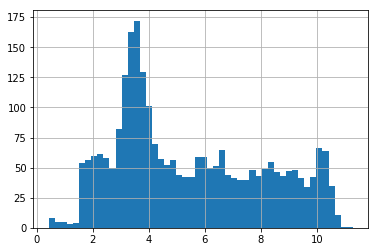

In [69]:
b.mean(1).hist(bins=50);

In [70]:
np.abs(b.median(1)-b.mean(1)).mean()

0.018641845208561308

In [71]:
b.mean(1).mean(),b.median(1).mean()

(5.4459935440203315, 5.441606979586106)

In [72]:
p=b.mean(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub200_a11.csv".format('mean'))
p.to_csv(fname,index=None)

In [73]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub200_a11.csv".format('median'))
p.to_csv(fname,index=None)